In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import scipy.sparse as sp
from sklearn.impute import SimpleImputer
import scikitplot as skplt
import pydotplus as pydot

In [2]:
%matplotlib inline

In [3]:
excel_file = 'D:\Homeq.xls'
df = pd.read_excel(excel_file)
df.head()

,Loan Default Status,Amount of this Loan,Amount Due on First Mortgage,Property Value,Reason for this Loan,Job Category,Years at Current Job,Number of Degrogatory Reports,Number of Delinquent Trade Lines,Age of Oldest Trade Line (months),Number of Recent Credit Inquiries,Number of Trade Lines,Debt to Income Ratio
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
df.columns

Index(['Loan Default Status', 'Amount of this Loan',
       'Amount Due on First Mortgage', 'Property Value',
       'Reason for this Loan', 'Job Category', 'Years at Current Job',
       'Number of Degrogatory Reports', 'Number of Delinquent Trade Lines',
       'Age of Oldest Trade Line (months)',
       'Number of Recent Credit Inquiries', 'Number of Trade Lines',
       'Debt to Income Ratio'],
      dtype='object')

In [5]:
df.tail()

,Loan Default Status,Amount of this Loan,Amount Due on First Mortgage,Property Value,Reason for this Loan,Job Category,Years at Current Job,Number of Degrogatory Reports,Number of Delinquent Trade Lines,Age of Oldest Trade Line (months),Number of Recent Credit Inquiries,Number of Trade Lines,Debt to Income Ratio
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [6]:
 df.dtypes

Loan Default Status                    int64
Amount of this Loan                    int64
Amount Due on First Mortgage         float64
Property Value                       float64
Reason for this Loan                  object
Job Category                          object
Years at Current Job                 float64
Number of Degrogatory Reports        float64
Number of Delinquent Trade Lines     float64
Age of Oldest Trade Line (months)    float64
Number of Recent Credit Inquiries    float64
Number of Trade Lines                float64
Debt to Income Ratio                 float64
dtype: object

In [7]:
df.describe()

,Loan Default Status,Amount of this Loan,Amount Due on First Mortgage,Property Value,Years at Current Job,Number of Degrogatory Reports,Number of Delinquent Trade Lines,Age of Oldest Trade Line (months),Number of Recent Credit Inquiries,Number of Trade Lines,Debt to Income Ratio
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [8]:
df.describe(include='all')

,Loan Default Status,Amount of this Loan,Amount Due on First Mortgage,Property Value,Reason for this Loan,Job Category,Years at Current Job,Number of Degrogatory Reports,Number of Delinquent Trade Lines,Age of Oldest Trade Line (months),Number of Recent Credit Inquiries,Number of Trade Lines,Debt to Income Ratio
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


In [9]:
df["Property Value"].min()

8000.0

In [10]:
df['Property Value'].count()

5848

In [11]:
df['Property Value'].max()

855909.0

In [12]:
df.count()

Loan Default Status                  5960
Amount of this Loan                  5960
Amount Due on First Mortgage         5442
Property Value                       5848
Reason for this Loan                 5708
Job Category                         5681
Years at Current Job                 5445
Number of Degrogatory Reports        5252
Number of Delinquent Trade Lines     5380
Age of Oldest Trade Line (months)    5652
Number of Recent Credit Inquiries    5450
Number of Trade Lines                5738
Debt to Income Ratio                 4693
dtype: int64

In [13]:
df.shape

(5960, 13)

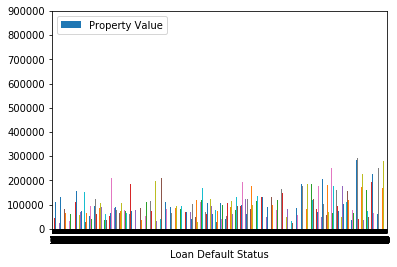

In [14]:
df.plot.bar(x='Loan Default Status',y='Property Value', rot=0)

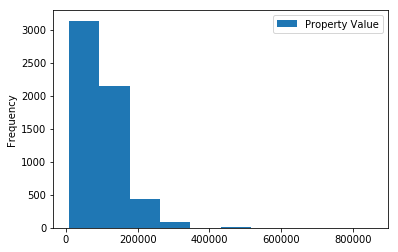

In [15]:
df.plot.hist(x='Loan Default Status',y='Property Value', rot=0)

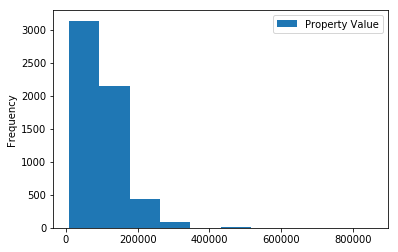

In [16]:
df.plot(kind = 'hist',x='Loan Default Status',y='Property Value', rot=0)
plt.show()

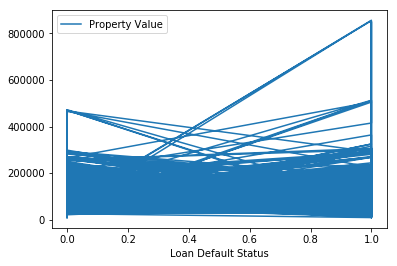

In [17]:
df.plot(kind = 'line',x='Loan Default Status',y='Property Value', rot=0)
plt.show()

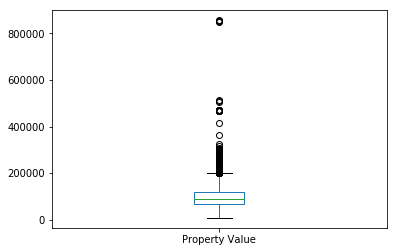

In [18]:
df.plot(kind = 'box',x='Loan Default Status',y='Property Value', rot=0)
plt.show()

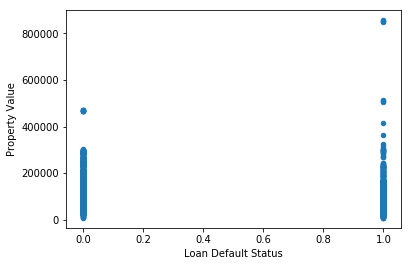

In [19]:
df.plot(kind = 'scatter',x='Loan Default Status',y='Property Value', rot=0)
plt.show()

In [20]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
Loan Default Status                  5960 non-null int64
Amount of this Loan                  5960 non-null int64
Amount Due on First Mortgage         5442 non-null float64
Property Value                       5848 non-null float64
Reason for this Loan                 5708 non-null object
Job Category                         5681 non-null object
Years at Current Job                 5445 non-null float64
Number of Degrogatory Reports        5252 non-null float64
Number of Delinquent Trade Lines     5380 non-null float64
Age of Oldest Trade Line (months)    5652 non-null float64
Number of Recent Credit Inquiries    5450 non-null float64
Number of Trade Lines                5738 non-null float64
Debt to Income Ratio                 4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 558.8+ KB


In [21]:
df.columns

Index(['Loan Default Status', 'Amount of this Loan',
       'Amount Due on First Mortgage', 'Property Value',
       'Reason for this Loan', 'Job Category', 'Years at Current Job',
       'Number of Degrogatory Reports', 'Number of Delinquent Trade Lines',
       'Age of Oldest Trade Line (months)',
       'Number of Recent Credit Inquiries', 'Number of Trade Lines',
       'Debt to Income Ratio'],
      dtype='object')

In [22]:
pd.isna(df)

,Loan Default Status,Amount of this Loan,Amount Due on First Mortgage,Property Value,Reason for this Loan,Job Category,Years at Current Job,Number of Degrogatory Reports,Number of Delinquent Trade Lines,Age of Oldest Trade Line (months),Number of Recent Credit Inquiries,Number of Trade Lines,Debt to Income Ratio
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,True
9,False,False,True,False,False,False,False,False,False,False,False,False,True


In [23]:
df.isnull().sum()

Loan Default Status                     0
Amount of this Loan                     0
Amount Due on First Mortgage          518
Property Value                        112
Reason for this Loan                  252
Job Category                          279
Years at Current Job                  515
Number of Degrogatory Reports         708
Number of Delinquent Trade Lines      580
Age of Oldest Trade Line (months)     308
Number of Recent Credit Inquiries     510
Number of Trade Lines                 222
Debt to Income Ratio                 1267
dtype: int64

In [24]:
df.isnull().sum()/len(df)*100

Loan Default Status                   0.000000
Amount of this Loan                   0.000000
Amount Due on First Mortgage          8.691275
Property Value                        1.879195
Reason for this Loan                  4.228188
Job Category                          4.681208
Years at Current Job                  8.640940
Number of Degrogatory Reports        11.879195
Number of Delinquent Trade Lines      9.731544
Age of Oldest Trade Line (months)     5.167785
Number of Recent Credit Inquiries     8.557047
Number of Trade Lines                 3.724832
Debt to Income Ratio                 21.258389
dtype: float64

In [25]:
df.head()

,Loan Default Status,Amount of this Loan,Amount Due on First Mortgage,Property Value,Reason for this Loan,Job Category,Years at Current Job,Number of Degrogatory Reports,Number of Delinquent Trade Lines,Age of Oldest Trade Line (months),Number of Recent Credit Inquiries,Number of Trade Lines,Debt to Income Ratio
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [26]:
df['Job Category'],_ = pd.factorize(df['Job Category'])
df.head()

,Loan Default Status,Amount of this Loan,Amount Due on First Mortgage,Property Value,Reason for this Loan,Job Category,Years at Current Job,Number of Degrogatory Reports,Number of Delinquent Trade Lines,Age of Oldest Trade Line (months),Number of Recent Credit Inquiries,Number of Trade Lines,Debt to Income Ratio
0,1,1100,25860.0,39025.0,HomeImp,0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,1,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [27]:
df['Reason for this Loan'],_ = pd.factorize(df['Reason for this Loan'])
df.head()

,Loan Default Status,Amount of this Loan,Amount Due on First Mortgage,Property Value,Reason for this Loan,Job Category,Years at Current Job,Number of Degrogatory Reports,Number of Delinquent Trade Lines,Age of Oldest Trade Line (months),Number of Recent Credit Inquiries,Number of Trade Lines,Debt to Income Ratio
0,1,1100,25860.0,39025.0,0,0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,0,0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,0,0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,0,1,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [28]:
df['Amount Due on First Mortgage'] = df['Amount Due on First Mortgage'].fillna(value=df['Amount Due on First Mortgage'].mean())
df['Property Value'] = df['Property Value'].fillna(value=df['Property Value'].mean())
df['Years at Current Job'] = df['Years at Current Job'].fillna(value=df['Years at Current Job'].mean())
df['Number of Degrogatory Reports'] = df['Number of Degrogatory Reports'].fillna(value=df['Number of Degrogatory Reports'].mean())
df['Number of Delinquent Trade Lines'] = df['Number of Delinquent Trade Lines'].fillna(value=df['Number of Delinquent Trade Lines'].mean())
df['Age of Oldest Trade Line (months)'] = df['Age of Oldest Trade Line (months)'].fillna(value=df['Age of Oldest Trade Line (months)'].mean())
df['Number of Recent Credit Inquiries'] = df['Number of Recent Credit Inquiries'].fillna(value=df['Number of Recent Credit Inquiries'].mean())
df['Number of Trade Lines'] = df['Number of Trade Lines'].fillna(value=df['Number of Trade Lines'].mean())
df['Debt to Income Ratio'] = df['Debt to Income Ratio'].fillna(value=0)

In [29]:
df.head()

,Loan Default Status,Amount of this Loan,Amount Due on First Mortgage,Property Value,Reason for this Loan,Job Category,Years at Current Job,Number of Degrogatory Reports,Number of Delinquent Trade Lines,Age of Oldest Trade Line (months),Number of Recent Credit Inquiries,Number of Trade Lines,Debt to Income Ratio
0,1,1100,25860.0000,39025.000000,0,0,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,0.0
1,1,1300,70053.0000,68400.000000,0,0,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,0.0
2,1,1500,13500.0000,16700.000000,0,0,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,0.0
3,1,1500,73760.8172,101776.048741,-1,-1,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,0.0
4,0,1700,97800.0000,112000.000000,0,1,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,0.0


In [30]:
target = df['Loan Default Status']
features = df[['Amount of this Loan','Amount Due on First Mortgage', 'Property Value',
       'Reason for this Loan', 'Job Category', 'Years at Current Job',
       'Number of Degrogatory Reports', 'Number of Delinquent Trade Lines',
       'Age of Oldest Trade Line (months)',
       'Number of Recent Credit Inquiries', 'Number of Trade Lines',
       'Debt to Income Ratio']]
features = df[df.columns[2:]]
features.head()


,Amount Due on First Mortgage,Property Value,Reason for this Loan,Job Category,Years at Current Job,Number of Degrogatory Reports,Number of Delinquent Trade Lines,Age of Oldest Trade Line (months),Number of Recent Credit Inquiries,Number of Trade Lines,Debt to Income Ratio
0,25860.0000,39025.000000,0,0,10.500000,0.00000,0.000000,94.366667,1.000000,9.000000,0.0
1,70053.0000,68400.000000,0,0,7.000000,0.00000,2.000000,121.833333,0.000000,14.000000,0.0
2,13500.0000,16700.000000,0,0,4.000000,0.00000,0.000000,149.466667,1.000000,10.000000,0.0
3,73760.8172,101776.048741,-1,-1,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,0.0
4,97800.0000,112000.000000,0,1,3.000000,0.00000,0.000000,93.333333,0.000000,14.000000,0.0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)

In [32]:
X_train.shape

(4172, 11)

In [33]:
y_train.head()

5774    1
5098    0
5428    0
257     0
507     1
Name: Loan Default Status, dtype: int64

In [34]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [35]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [36]:
y_pred = dtree.predict(X_test)

In [37]:
count_misclassified = (y_test != y_pred).sum()

In [38]:
count_misclassified

209

In [39]:
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 209


In [40]:
y_test.shape

(1788,)

In [41]:
misclassification_rate = (count_misclassified/1788)*100
misclassification_rate

11.68903803131991

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print('Misclassification Rate')
print('Accuracy: {:.2f}'.format(accuracy))

Misclassification Rate
Accuracy: 0.88


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[1307,   82],
       [ 127,  272]], dtype=int64)

In [44]:
import scikitplot as skplt
from sklearn.metrics import roc_curve, auc


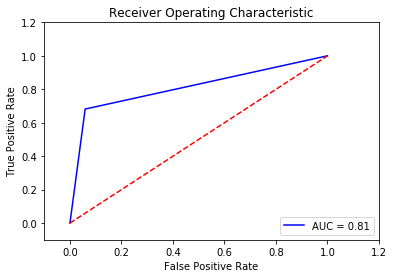

In [45]:
# import scikitplot as skplt
# skplt.metrics.plot_roc_curve(y_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

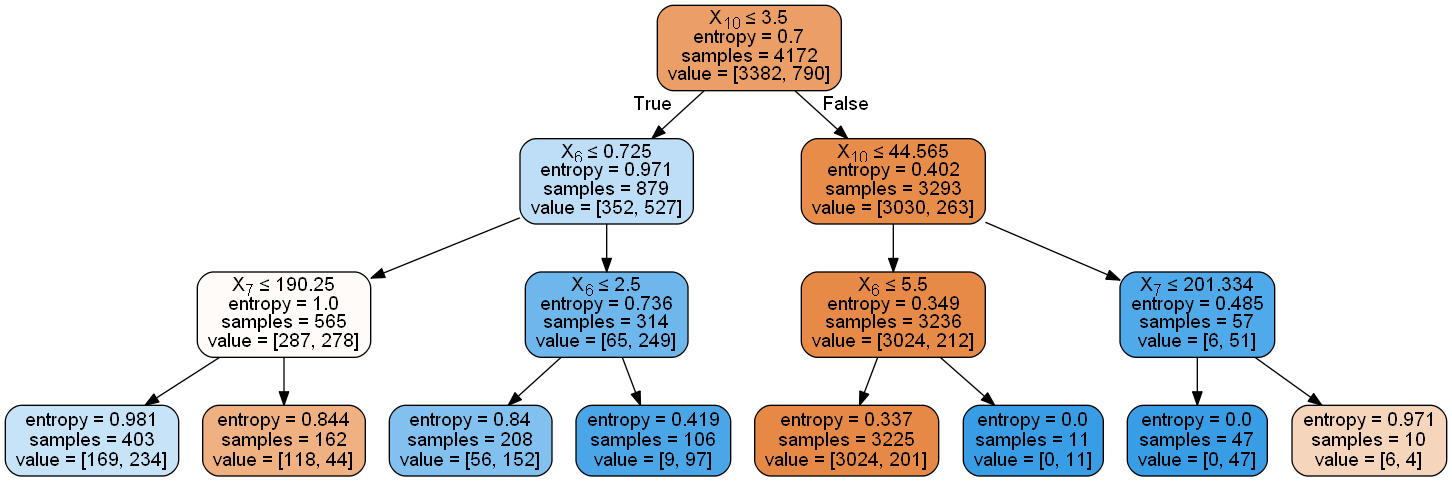

In [46]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())